# Analysis of Pre-Trained Sentiment Models

Storing in separate notebook to avoid re-running all models. 

Setting up our env:
- loading libraries 
- setting matplotlib theme 

In [1847]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [1848]:
# Set theme for creating visualizations

# Set text sizes
title_size = 22
label_size = 16
tick_text_size = 12

# Set background and text colors
background_color = '#F7F7F4'
text_color = 'black'

# Set options of colors for use in plotting
color1 = "#9FB881"  # (dark green)
color2 = "#B89A81"  # (brown)
color3 = "#2E4057"  # (charcoal)
color4 = "#cfbaa9"  # (light brown)
color5 = "#806248"  # (dark brown)
color6 = "#B8B681"  # (dark tan)
color7 = "#D19C1D"  # (gold)
color8 = "#969966"  # (army green)

# Set theme for creating visualizations
plt.rcParams.update({
                     'axes.edgecolor': 'white',
                     'axes.facecolor': background_color,
                     'axes.grid': True,
                     'axes.labelcolor': text_color,
                     'axes.titlesize': title_size,
                     'axes.labelsize': label_size,
                     'figure.facecolor': background_color,
                     'text.color': text_color,
                     'xtick.color': text_color,
                     'xtick.labelsize' : tick_text_size,
                     'ytick.color': text_color,
                     'ytick.labelsize' : tick_text_size,
                     })

### Loading Data from `sentiment.ipynb`

In [1849]:
data = pd.read_csv('./data_with_sentiment.csv')

Understanding the data

In [1850]:
data.head(3)

,created_at,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,user_screen_name,user_name,...,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs,hate_output
0,2022-10-18 00:00:00,Sharp words on guns in Shane Hazel to Stacey A...,['gagovdebate'],[],[],5,24,25282846,SimonesNews,Simone Sebastian,...,sharp words guns shane hazel stacey abrams kee...,sharp words guns shane hazel keep going back g...,0.3818,positive,"{'NEG': 0.6141573190689087, 'NEU': 0.378498435...",NEG,"{'others': 0.1764051467180252, 'joy': 0.002714...",disgust,"{'hateful': 0.005217170342803001, 'targeted': ...",[]
1,2022-10-18 00:00:01,Stacey Abrams won tonight. She kept to the fac...,[],[],[],0,6,1312393604439183361,nching0,Thee Lost Edges of Candace 🪥,...,stacey abrams tonight kept facts answered ques...,tonight kept facts answered questions math poi...,0.7351,positive,"{'NEG': 0.01712794601917267, 'NEU': 0.41241669...",POS,"{'others': 0.9740970134735107, 'joy': 0.014058...",others,"{'hateful': 0.008792026899755001, 'targeted': ...",[]
2,2022-10-18 00:00:01,"Why did Joe Rogan send his little brother, Sha...",['GAGovDebate'],[],[],0,5,897218253826555905,JTaylorSkinner,Jenn Taylor-Skinner (she/her),...,joe rogan send little brother shane interrupt ...,joe rogan send little brother shane interrupt ...,-0.2500,negative,"{'NEG': 0.3434396982192993, 'NEU': 0.649206459...",NEU,"{'others': 0.0670844316482544, 'joy': 0.001664...",disgust,"{'hateful': 0.006042167544364929, 'targeted': ...",[]


### Getting Average VADER Sentiment Scores

In [1851]:
### Get the counts of all tweets of each specific category (Abrams, Kemp, Election)

# Explode topics into a single row for each
data['topic'] = data['topic'].apply(lambda x: x.replace(',', ''))
data['topic'] = data['topic'].apply(lambda x: x.split())
topic_counts = data.explode('topic')

# Group by search term topic (kemp, abrams, or election)
topic_counts = topic_counts.groupby(['topic'])['sentiment_score'].mean().reset_index()

# View results
topic_counts

,topic,sentiment_score
0,abrams,-0.024808
1,election,0.018225
2,kemp,0.007445


### Visualizing Avg Sentiment Scores

(-0.03, 0.03)

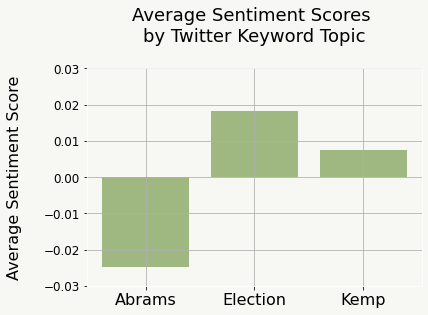

In [1852]:
fig, ax = plt.subplots()

plt.bar(topic_counts['topic'].str.capitalize(), topic_counts['sentiment_score'], color = color1)

# uncomment this to see counts above bars 

# for i in range(len(topic_counts['topic'])):
#     plt.text(i, topic_counts['sentiment_score'][i], np.round(topic_counts['sentiment_score'][i], 3), ha = 'center', size = 12)

plt.xticks(size = 16)
plt.title('Average Sentiment Scores \nby Twitter Keyword Topic\n', size = 18)
plt.ylabel('Average Sentiment Score\n', size = 16)
plt.ylim(-0.03, 0.03)

### Getting Proportions of Tweets in each sentiment bin

In [1853]:
topic_counts = data.explode('topic')

# getting count of tweets by topic
topic_counts_bin = topic_counts.groupby(['topic', 'sentiment_bin']).count().reset_index().rename(columns = {'created_at':'counts'})
topic_counts_bin = topic_counts_bin[['topic', 'sentiment_bin', 'counts']]

In [1854]:
total_tweets = topic_counts_bin.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

# merging in total counts
topic_counts_bin = topic_counts_bin.merge(total_tweets, on = 'topic', how = 'inner')

# getting proportion of tweets by topic
topic_counts_bin['prop'] = topic_counts_bin['counts'] / topic_counts_bin['total_tweets']

### Visualizing the Proportion of Tweets by Topic

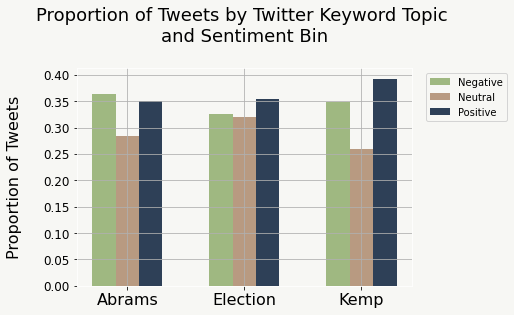

In [1855]:
fig, ax = plt.subplots()

x = np.arange(len(topic_counts_bin['topic'].unique()))

neg = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'negative']['prop'])
neu = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'neutral']['prop'])
pos = list(topic_counts_bin[topic_counts_bin['sentiment_bin'] == 'positive']['prop'])
width = 0.2

plt.bar(x - 0.2, neg, width = width, color = color1)
plt.bar(x, neu, width = width, color = color2)
plt.bar(x + 0.2, pos, width = width, color = color3)

plt.xticks(x, ['Abrams', 'Election', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Twitter Keyword Topic \nand Sentiment Bin\n', size = 18)
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend(['Negative', 'Neutral', 'Positive'], loc = 'upper right', bbox_to_anchor = (1.3,1))

In [1856]:
topic_counts = data.explode('topic')

topic_counts_emotion = topic_counts.groupby(['topic', 'emotion_output']).count().reset_index().rename(columns = {'created_at': 'counts'})

In [1857]:
topic_counts_emotion_sub = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]

In [1858]:
total_tweets = topic_counts_emotion_sub.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

topic_counts_emotion_sub = topic_counts_emotion_sub.merge(total_tweets, on = 'topic', how = 'inner')

topic_counts_emotion_sub['prop'] = topic_counts_emotion_sub['counts'] / topic_counts_emotion_sub['total_tweets']

In [1859]:
topic_counts_emotion_sub = topic_counts_emotion_sub[['topic', 'emotion_output', 'prop']]
topic_counts_emotion_sub = topic_counts_emotion_sub.sort_values(['topic', 'prop'])

In [1860]:
import seaborn as sns

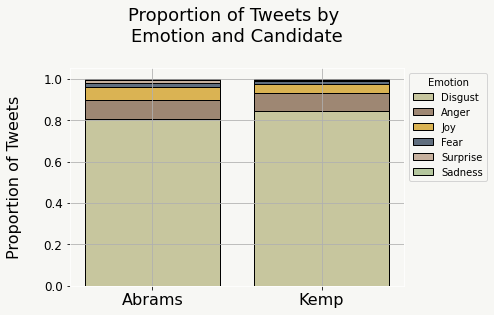

In [1861]:
sns.histplot(
    topic_counts_emotion_sub,
    x = 'topic',
    weights = 'prop',
    hue = 'emotion_output',
    multiple = 'stack',
    palette = [color1, color2, color3, color7, color5, color6],
    shrink = 0.8
)

plt.title('Proportion of Tweets by \nEmotion and Candidate\n', fontsize = 18)
plt.ylabel('Proportion of Tweets\n', fontsize = 16)
plt.xlabel('')
plt.xticks([0,1], ['Abrams', 'Kemp'], fontsize = 16)

plt.legend(title = 'Emotion', labels = ['Disgust', 'Anger', 'Joy', 'Fear', 'Surprise', 'Sadness'], loc = 2, bbox_to_anchor = (1,1))

In [1862]:
topic_counts_emotion_sub_no_dis = topic_counts_emotion[(topic_counts_emotion['emotion_output'] != 'others') & (topic_counts_emotion['emotion_output'] != 'disgust') & ((topic_counts_emotion['topic'] == 'abrams') | (topic_counts_emotion['topic'] == 'kemp'))]

In [1863]:
total_tweets = topic_counts_emotion_sub_no_dis.groupby('topic')['counts'].sum().reset_index().rename(columns = {'counts': 'total_tweets'})

topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis.merge(total_tweets, on = 'topic', how = 'inner')

topic_counts_emotion_sub_no_dis['prop'] = topic_counts_emotion_sub_no_dis['counts'] / topic_counts_emotion_sub_no_dis['total_tweets']

In [1864]:
topic_counts_emotion_sub_no_dis = topic_counts_emotion_sub_no_dis[['topic', 'emotion_output', 'prop']]
topic_counts_emotion_sub_no_dis

,topic,emotion_output,prop
0,abrams,anger,0.489040
1,abrams,fear,0.107820
2,abrams,joy,0.309538
3,abrams,sadness,0.029917
4,abrams,surprise,0.063685
5,kemp,anger,0.548329
6,kemp,fear,0.072267
7,kemp,joy,0.296296
8,kemp,sadness,0.032520
9,kemp,surprise,0.050587


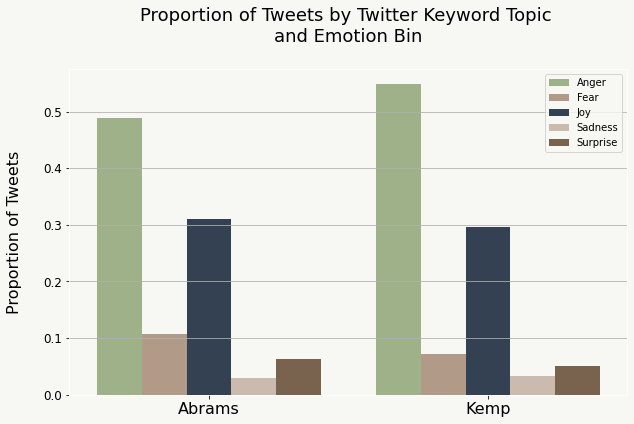

In [1865]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_topic_plot_df = topic_counts_emotion_sub_no_dis.pivot(index="emotion_output", columns="topic", values="prop")

color_chart = {
    "anger": color1,
    "fear": color2,
    "joy": color3,
    "sadness": color4,
    "surprise": color5,
}
topic_counts_emotion_sub_no_dis['bar_color'] = topic_counts_emotion_sub_no_dis['emotion_output'].apply(lambda x: color_chart[x])
topic_counts_emotion_sub_no_dis['emotion_output_up'] = topic_counts_emotion_sub_no_dis['emotion_output'].apply(lambda x: str.capitalize(x))

sns.barplot(data=topic_counts_emotion_sub_no_dis, 
            x='topic', 
            y='prop', 
            hue='emotion_output_up', 
            palette=topic_counts_emotion_sub_no_dis['bar_color'])
plt.xticks([0,1], ['Abrams', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Twitter Keyword Topic \nand Emotion Bin\n', size = 18)
plt.xlabel('')
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend()

In [1866]:
topic_counts = data.explode('topic')
hate_counts = topic_counts.groupby(['topic', 'hate_output']).count().reset_index().rename(columns={'created_at':'counts'})
hate_counts['hate_output'] = hate_counts['hate_output'].str[1:-1]

hate_counts['hate_output'] = hate_counts['hate_output'].str.replace("'", "").str.split(',')

hate_counts = hate_counts.explode('hate_output')

In [1867]:
hate_counts = hate_counts.groupby(['topic', 'hate_output']).sum().reset_index().rename(columns={'created_at':'counts'}) 
hate_counts

,topic,hate_output,counts,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,...,text_clean,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs
0,abrams,,31707,31707,31707,31707,31707,31707,31707,31707,...,31707,31691,30946,31707,31707,31707,31707,31707,31707,31707
1,abrams,aggressive,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
2,abrams,targeted,2378,2378,2378,2378,2378,2378,2378,2378,...,2378,2378,2377,2378,2378,2378,2378,2378,2378,2378
3,abrams,hateful,4155,4155,4155,4155,4155,4155,4155,4155,...,4155,4154,4152,4155,4155,4155,4155,4155,4155,4155
4,abrams,targeted,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
5,election,,6065,6065,6065,6065,6065,6065,6065,6065,...,6065,6062,6051,6065,6065,6065,6065,6065,6065,6065
6,election,aggressive,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
7,election,targeted,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
8,election,hateful,226,226,226,226,226,226,226,226,...,226,225,225,226,226,226,226,226,226,226
9,kemp,,14298,14298,14298,14298,14298,14298,14298,14298,...,14298,14295,14227,14298,14298,14298,14298,14298,14298,14298


In [1868]:
hate_counts = hate_counts.drop(index=[4,13])

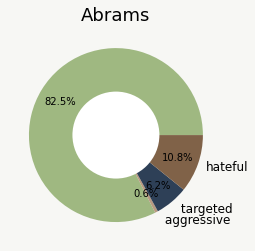

In [1869]:

plt.pie(hate_counts[hate_counts['topic'] == 'abrams']['counts'], labels = hate_counts[hate_counts['topic'] == 'abrams']['hate_output'], \
                        autopct='%1.1f%%', pctdistance=0.75, colors = [color1, color2, color3, color5])
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Abrams', size = 18)
  
# Displaying Chart
plt.show()

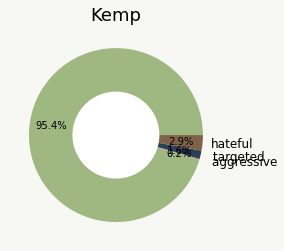

In [1870]:

plt.pie(hate_counts[hate_counts['topic'] == 'kemp']['counts'], labels = hate_counts[hate_counts['topic'] == 'kemp']['hate_output'], \
                        autopct='%1.1f%%', pctdistance=0.75, colors = [color1, color2, color3, color5])
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Kemp', size = 18)
  
# Displaying Chart
plt.show()

In [1871]:
hate_counts = hate_counts.groupby(['topic', 'hate_output']).sum().reset_index().rename(columns={'created_at':'counts'})   

hate_counts = hate_counts[hate_counts['hate_output'] != '']
hate_counts

,topic,hate_output,counts,text,hashtags,user_mention_ids,user_mention_screen_names,retweet_count,favorite_count,user_id,...,text_clean,text_clean_noStop,text_clean_noStop_noSearch,sentiment_score,sentiment_bin,sentiment_probs,sentiment_output,emotion_probs,emotion_output,hate_probs
1,abrams,aggressive,213,213,213,213,213,213,213,213,...,213,213,213,213,213,213,213,213,213,213
2,abrams,targeted,2378,2378,2378,2378,2378,2378,2378,2378,...,2378,2378,2377,2378,2378,2378,2378,2378,2378,2378
3,abrams,hateful,4155,4155,4155,4155,4155,4155,4155,4155,...,4155,4154,4152,4155,4155,4155,4155,4155,4155,4155
5,election,aggressive,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
6,election,targeted,128,128,128,128,128,128,128,128,...,128,128,128,128,128,128,128,128,128,128
7,election,hateful,226,226,226,226,226,226,226,226,...,226,225,225,226,226,226,226,226,226,226
9,kemp,aggressive,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
10,kemp,targeted,234,234,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234
11,kemp,hateful,430,430,430,430,430,430,430,430,...,430,430,430,430,430,430,430,430,430,430


In [1872]:
hate_counts = hate_counts[hate_counts['topic'] != 'election']
hate_counts = hate_counts[['topic', 'hate_output', 'counts']].reset_index()
hate_counts

,index,topic,hate_output,counts
0,1,abrams,aggressive,213
1,2,abrams,targeted,2378
2,3,abrams,hateful,4155
3,9,kemp,aggressive,32
4,10,kemp,targeted,234
5,11,kemp,hateful,430


In [1873]:
# hate_counts = hate_counts.drop(index=[3,7])
# hate_counts

In [1874]:
total_tweets = hate_counts.groupby('topic').sum().reset_index().rename(columns={'counts':'total_counts'})   
total_tweets = total_tweets[['topic', 'total_counts']]

In [1875]:
hate_counts = hate_counts.merge(total_tweets, on = 'topic', how = 'inner')
hate_counts['prop'] = hate_counts['counts'] / hate_counts['total_counts']

In [1876]:
hate_counts

,index,topic,hate_output,counts,total_counts,prop
0,1,abrams,aggressive,213,6746,0.031574
1,2,abrams,targeted,2378,6746,0.352505
2,3,abrams,hateful,4155,6746,0.615921
3,9,kemp,aggressive,32,696,0.045977
4,10,kemp,targeted,234,696,0.336207
5,11,kemp,hateful,430,696,0.617816


In [1877]:
hate_counts['hate_output'][0] = hate_counts['hate_output'][0][1:]
hate_counts['hate_output'][1] = hate_counts['hate_output'][1][1:]
hate_counts['hate_output'][3] = hate_counts['hate_output'][3][1:]
hate_counts['hate_output'][4] = hate_counts['hate_output'][4][1:]

<ipython-input-1877-b53aea24a05a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_counts['hate_output'][0] = hate_counts['hate_output'][0][1:]
<ipython-input-1877-b53aea24a05a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_counts['hate_output'][1] = hate_counts['hate_output'][1][1:]
<ipython-input-1877-b53aea24a05a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_counts['hate_output'][3] = hate_counts['hate_output']

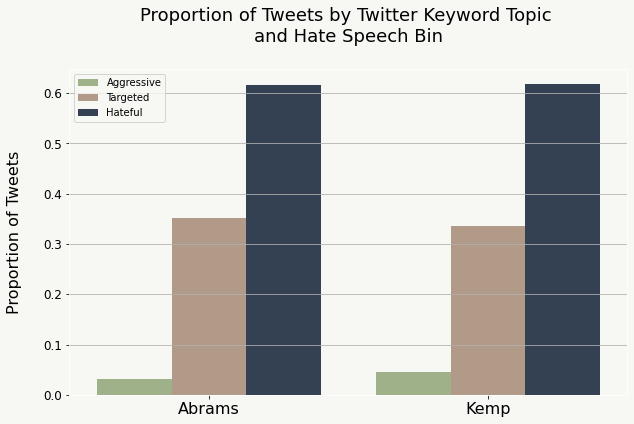

In [1878]:
fig, ax = plt.subplots(figsize=(10, 6))

# grouped_topic_plot_df = hate_counts.pivot(index="emotion_output", columns="topic", values="prop")

color_chart = {
    "aggressive": color1,
    "targeted": color2,
    "hateful": color3,
}
hate_counts['bar_color'] = hate_counts['hate_output'].apply(lambda x: color_chart[x])
hate_counts['hate_output_up'] = hate_counts['hate_output'].apply(lambda x: str.capitalize(x))

sns.barplot(data=hate_counts, 
            x='topic', 
            y='prop', 
            hue='hate_output_up', 
            palette=hate_counts['bar_color'])
plt.xticks([0,1], ['Abrams', 'Kemp'],size = 16)
plt.title('Proportion of Tweets by Twitter Keyword Topic \nand Hate Speech Bin\n', size = 18)
plt.xlabel('')
plt.ylabel('Proportion of Tweets\n', size = 16)
plt.legend()